## FiftyOne Quickstart

In this quickstart we will walk through some of the features FiftyOne offers that will help you get closer to your CV/ML data and models.

### Install FiftyOne from pip

In [ ]:
!pip install fiftyone

### Import FiftyOne, and load the quickstart

The [`quickstart()`](https://voxel51.com/docs/fiftyone/api/fiftyone.utils.quickstart.html#fiftyone.utils.quickstart.quickstart) is a utility method that we have added to get you up and running in a jiff. It returns two object types that are core to FiftyOne as a tuple, a [`Dataset`](https://voxel51.com/docs/fiftyone/api/fiftyone.core.dataset.html#fiftyone.core.dataset.Dataset) and a [`Session`](https://voxel51.com/docs/fiftyone/api/fiftyone.core.session.html#fiftyone.core.session.Session). The [`Dataset`](https://voxel51.com/docs/fiftyone/api/fiftyone.core.dataset.html#fiftyone.core.dataset.Dataset) is a small detection dataset that will help you explore the capabilities of FiftyOne. The [`Session`](https://voxel51.com/docs/fiftyone/api/fiftyone.core.session.html#fiftyone.core.session.Session) is your bi-directional connection to your Python kernel and the FiftyOne App, the visualization component of FiftyOne.

Right away you will see that because we are in a notebook, an embedded instance of the App with our dataset loaded has been rendered in the cell's output.


Welcome to FiftyOne!

This quickstart downloaded a dataset from the Dataset Zoo and created a
session, which is a connection to an instance of the App.

The dataset contains ground truth labels in a `ground_truth` field and
predictions from an off-the-shelf detector in a `predictions` field. It also
has a `uniqueness` field that indexes the dataset by visual uniqueness.

Here are some things you can do to explore the dataset:


(a) Double-click on an image to explore its labels in more detail


(b) Sort the dataset by uniqueness:

    - Click `add stage`
    - Select the `SortBy` stage
    - Select the `uniqueness` field

    Try setting `reverse` to `True` to show the *most unique* images first.
    Try setting `reverse` to `False` to show the *least unique* images first.


(c) Filter predictions by confidence

    The predictions field is noisy, but you can use FiftyOne to filter them!

    In the display options menu on the left, click on the `v` caret to the
    right of the `pred


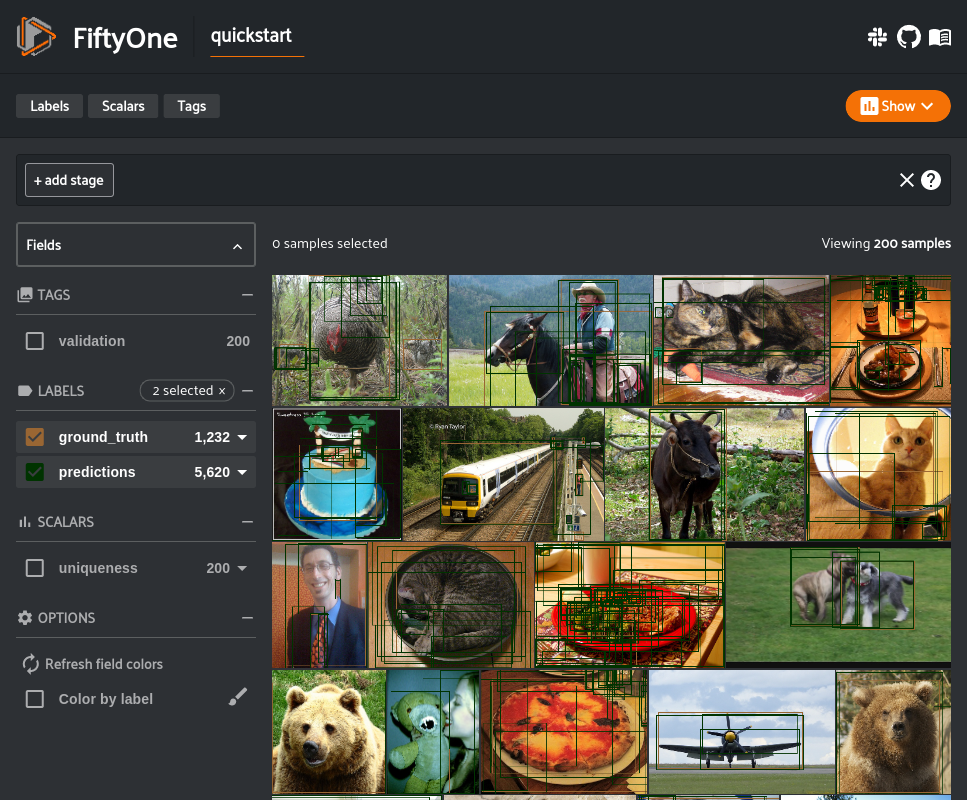

In [1]:
import fiftyone as fo

dataset, session = fo.quickstart()

### Automatic screenshots as you work

Notebooks are great for many reason, not the least of which is the ability to share your work with others. To best facilitate sharing notebooks that use FiftyOne, we have baked in automatic screenshots into FiftyOne when using notebooks. An App's iframe will automatically be replaced with a screenshot of the App when you trigger a new App output by modifying your [`Session`](https://voxel51.com/docs/fiftyone/api/fiftyone.core.session.html#fiftyone.core.session.Session), or using the [`session.show()`](https://voxel51.com/docs/fiftyone/api/fiftyone.core.session.html#fiftyone.core.session.Session.show) method.

Let's use the the [`session.show()`](https://voxel51.com/docs/fiftyone/api/fiftyone.core.session.html#fiftyone.core.session.Session.show) to capture a screenshot of the first App output you see above, and show a new App output below so we can inspect an individual sample. Double clicking on an image in the grid will expand the sample.


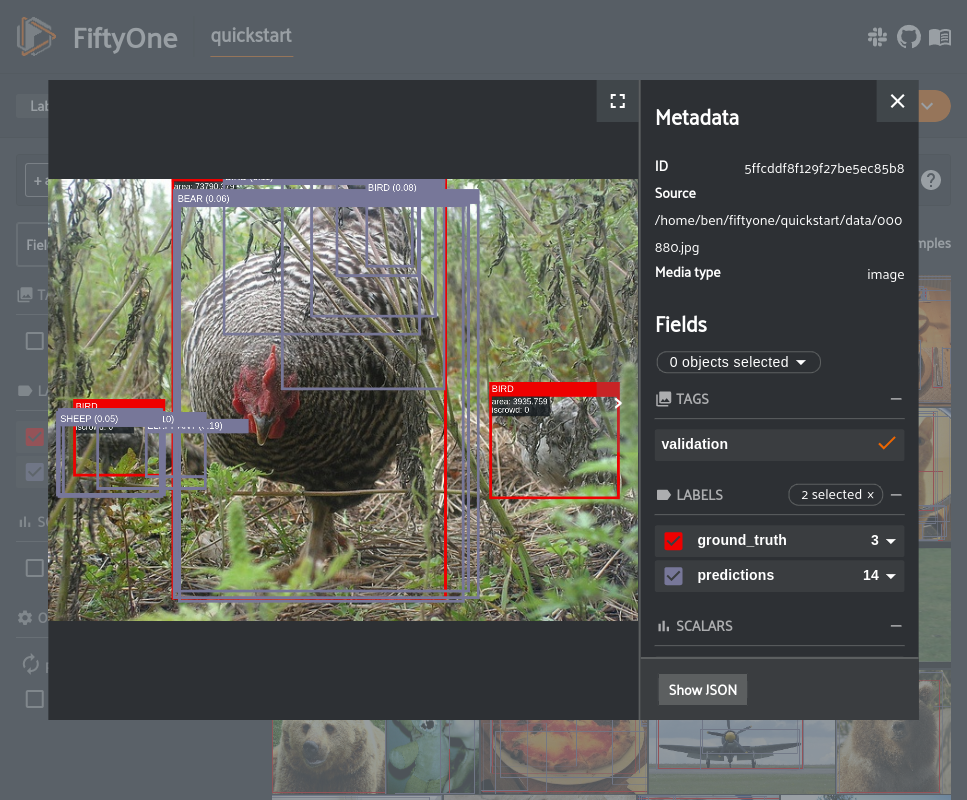

In [2]:
session.show()

### FiftyOne Views

The power of FiftyOne truly comes alive when using [`DatasetView`s](https://voxel51.com/docs/fiftyone/api/fiftyone.core.view.html#fiftyone.core.view.DatasetView). You can think of a [`Dataset`](https://voxel51.com/docs/fiftyone/api/fiftyone.core.dataset.html#fiftyone.core.dataset.Dataset) as your root view into your data. A [`DatasetView`s](https://voxel51.com/docs/fiftyone/api/fiftyone.core.view.html#fiftyone.core.view.DatasetView) is an extension of this root view, and any [`DatasetView`s](https://voxel51.com/docs/fiftyone/api/fiftyone.core.view.html#fiftyone.core.view.DatasetView) can be attached to your [`Session`](https://voxel51.com/docs/fiftyone/api/fiftyone.core.session.html#fiftyone.core.session.Session) to visualize.

[`DatasetView`s](https://voxel51.com/docs/fiftyone/api/fiftyone.core.view.html#fiftyone.core.view.DatasetView) can be created and modified both in Python and in the App. The active in the App is always available via the [`Session.view`](https://voxel51.com/docs/fiftyone/api/fiftyone.core.session.html#fiftyone.core.session.Session.view) property. This property can be set via Python, as well.

Let's first try creating a view of our dataset via the App. We'll sort the dataset by the `uniqueness` field in reverse. To do this, we will click `+ add stage` in the View Bar and add a `SortBy` stage with `uniqueness` as the field, and `reverse` equal to `True`.


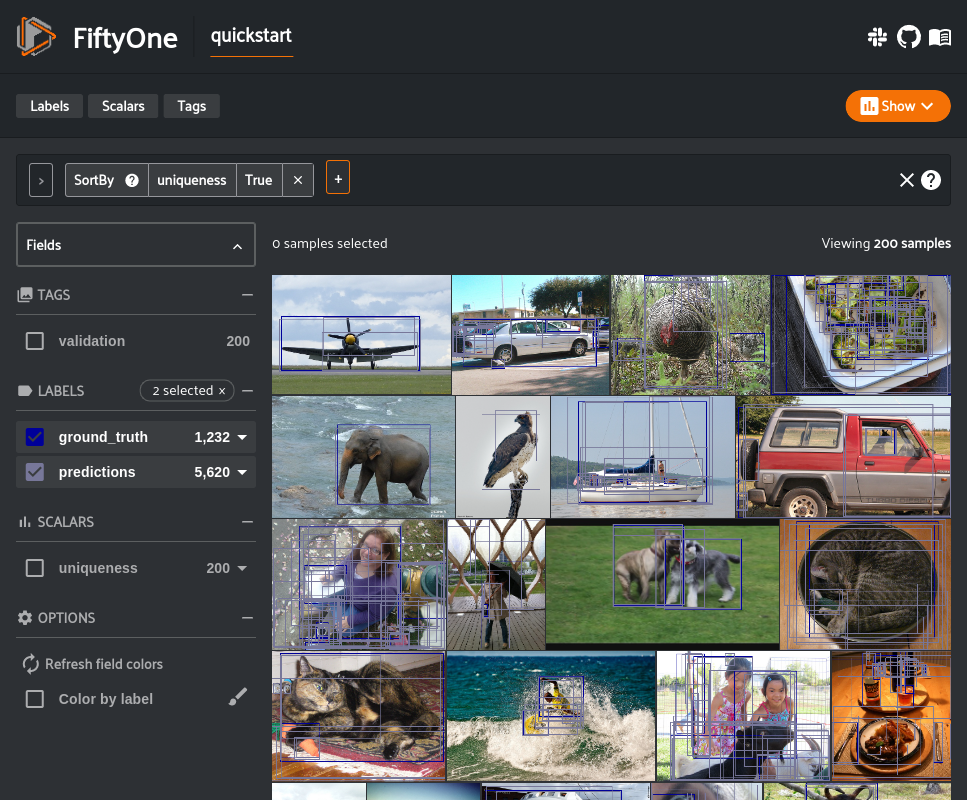

In [3]:
session.show()

We can then access the view in Python and print the most uniquee image [Sample](https://voxel51.com/docs/fiftyone/api/fiftyone.core.sample.html)

In [4]:
print(session.view.first())

<SampleView: {
    'id': '5ffcddf8f129f27be5ec8876',
    'media_type': 'image',
    'filepath': '/home/ben/fiftyone/quickstart/data/003486.jpg',
    'tags': BaseList(['validation']),
    'metadata': None,
    'ground_truth': <Detections: {
        'detections': BaseList([
            <Detection: {
                'id': '5f452482ef00e6374aacf803',
                'attributes': BaseDict({
                    'area': <NumericAttribute: {'value': 23541.39925000001}>,
                    'iscrowd': <NumericAttribute: {'value': 0.0}>,
                }),
                'label': 'airplane',
                'bounding_box': BaseList([
                    0.05365625,
                    0.34533957845433255,
                    0.769828125,
                    0.45049180327868854,
                ]),
                'mask': None,
                'confidence': None,
                'index': None,
            }>,
        ]),
    }>,
    'uniqueness': 1.0,
    'predictions': <Detections: {
        

### Complex views in Python

Sometimes the view we want to create is quite particular, made up of a series of [`Stage`s](https://voxel51.com/docs/fiftyone/api/fiftyone.core.stages.html), the building blocks of views. Using Python is often easier in this cases, and encourages reproducibility.

As an example, let's create a view that only contains detections with a confidence greater than `0.8`, and visualize it. Because we are in a notebook, any time we change our [`Session`](https://voxel51.com/docs/fiftyone/api/fiftyone.core.session.html#fiftyone.core.session.Session) object, a new App will be displayed in the cell's output.


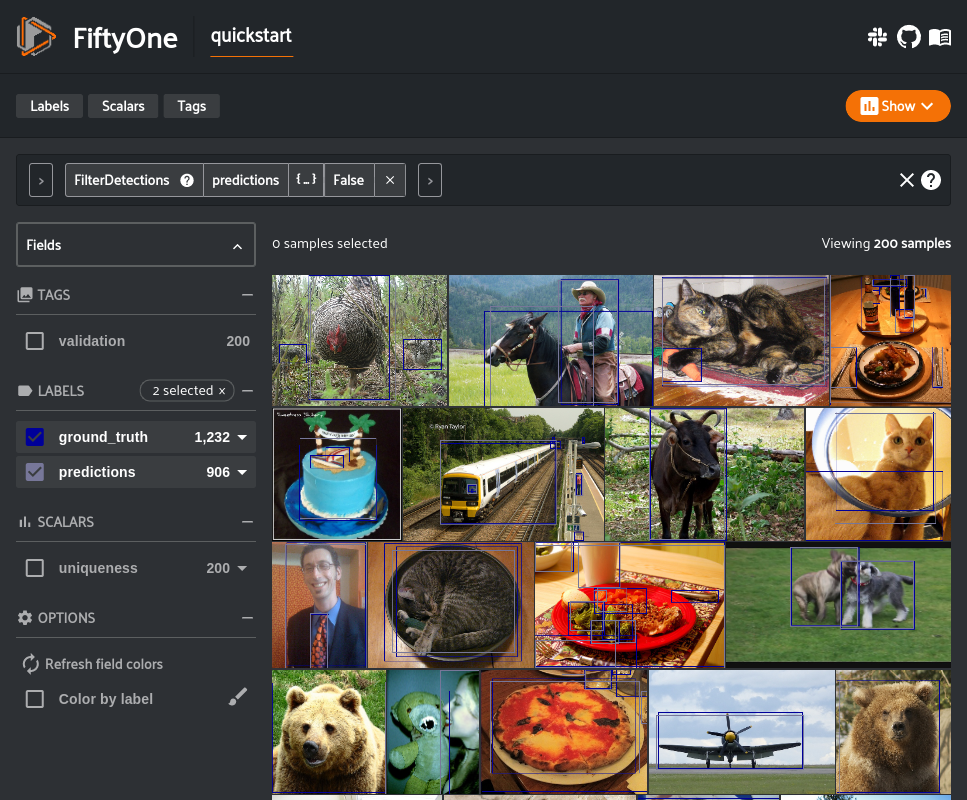

In [5]:
from fiftyone import ViewField as F


high_conf_view = dataset.filter_detections(
    "predictions", F("confidence") > 0.8
)

# Show the view in the App!
session.view = high_conf_view

### Share your notebook

To make our notebook ready for sharing, we will need to screenshot the currently active App. [`Session.freeze()`](https://voxel51.com/docs/fiftyone/api/fiftyone.core.session.html#fiftyone.core.session.Session.freeze) accomplishes this.

In [6]:
session.freeze()

Ensuring all of App outputs are screenshot allows for anyone so see the same App visualizations you see when when they first open the notebook.

### Beyond the basics

We have just walked through the core functionalities of FiftyOne. We encourage you to check out the FiftyOne [Recipes](https://voxel51.com/docs/fiftyone/recipes/index.html) and [Tutorials](https://voxel51.com/docs/fiftyone/tutorials/index.html) to find more concrete and complex use cases of FiftyOne. 

And did we mention that FiftyOne is open source? Please check out the the [GitHub repository](https://github.com/voxel51/fiftyone). Or [leave an issue](https://github.com/voxel51/fiftyone/issues/new/choose) if you think something is missing. Thanks for tuning in!